# PRCP-1017 Auto Price Prediction

# Team ID - PTID-CDS-APR-25-2620

### Domain: Automobile Industry 

### Objective 

To develop a predictive machine learning model that accurately estimates the price of a car based on various independent variables such as engine size, horsepower, brand, body type, fuel type, mileage, and other design and performance features. 

# 1. Introduction

### 1.1 Importance of price prediction and ML application in Automobile sector.

The aim of the model is to provide interpretable insights from each variable and its influence on car pricing, enabling the management to:

* Understand key pricing drivers in the car market.

* Optimize car design features to align with specific price segments.

* Formulate strategic pricing and marketing decisions based on data-driven insights.

* Predict price ranges for new models before launch.

### 1.2 Brief about the dataset 

The Automobile Imports Price Prediction dataset is designed to predict the market price of various cars based on their technical specifications, design features, and fuel efficiency. The dataset contains 26 attributes comprising of both categorical and numerical features.
It consists of 202 records.

### 1.3 Attributes Description

1. Symboling – This is an insurance risk rating; ranges from -3 (least risky) to +3 (most risky).

2. Normalized-losses – It represents the average insurance loss for a car; higher means more loss-prone.

3. Make – Manufacturer or brand of the car (e.g., BMW, Toyota, Honda).

4. Fuel-Type – Type of fuel the car uses: gasoline or diesel.

5. Aspiration – Engine air intake type: standard (normal) or turbocharged.

6. Num-of-doors – Number of doors: two or four.

7. Body-style – Design type of the vehicle (e.g., sedan, hatchback, convertible).

8. Drive-wheels – Which wheels receive power: front-wheel, rear-wheel, or four-wheel drive.

9. Engine-location – Position of the engine: front or rear of the car.

10. Wheel-base – Distance between the front and rear wheels; affects stability.

11. Length – Overall length of the car.

12. Width – Overall width of the car.

13. Height – Overall height of the car.

14. Curb-weight – Total weight of the car without passengers or cargo.

15. Engine-type – Technical engine design, like ohc (overhead cam) or l (inline).

16. Num-of-cylinders – Number of cylinders in the engine; affects power and fuel use.

17. Engine-size – Total engine displacement ; higher = more powerful.

18. Fuel-system – Method by which fuel is supplied to the engine (e.g., mpfi, 2bbl).

19. Bore – Diameter of each cylinder in the engine.

20. Stroke – Distance the piston travels inside the cylinder.

21. Compression-ratio – Ratio of the maximum to minimum volume in the combustion chamber.

22. Horsepower – Power output of the engine; higher = better performance.

23. Peak-rpm – Engine speed (revolutions per minute) at which peak horsepower is reached.

24. City-mpg – Fuel efficiency in city driving (miles per gallon).

25. Highway-mpg – Fuel efficiency on highways.

# 2. Data loading and overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2.1 Loading the Data and Renaming the columns

In [2]:
#Renaming the columns
column_names = ['Symboling', 'Normalized_Losses', 'Make', 'Fuel_Type',
       'Aspiration', 'No_of_Doors', 'Body_Style', 'Drive_Wheels',
       'Engine_Location', 'Wheel_Base', 'Length', 'Width', 'Height',
       'Curb_Weight', 'Engine_Type', 'No_of_Cylinders', 'Engine_Size',
       'Fuel_System', 'Bore', 'Stroke', 'Compression_ratio', 'Horsepower',
       'Peak_RPM', 'City_mpg', 'Highway_mpg', 'Price']

# Read the CSV without treating the first row as header
df = pd.read_csv("auto_imports.csv", header=None, names=column_names)

In [3]:
df

,Symboling,Normalized_Losses,Make,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,...,Engine_Size,Fuel_System,Bore,Stroke,Compression_ratio,Horsepower,Peak_RPM,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
df.columns

Index(['Symboling', 'Normalized_Losses', 'Make', 'Fuel_Type', 'Aspiration',
       'No_of_Doors', 'Body_Style', 'Drive_Wheels', 'Engine_Location',
       'Wheel_Base', 'Length', 'Width', 'Height', 'Curb_Weight', 'Engine_Type',
       'No_of_Cylinders', 'Engine_Size', 'Fuel_System', 'Bore', 'Stroke',
       'Compression_ratio', 'Horsepower', 'Peak_RPM', 'City_mpg',
       'Highway_mpg', 'Price'],
      dtype='object')

### 2.2 Basic checks

In [5]:
df.head()

,Symboling,Normalized_Losses,Make,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,...,Engine_Size,Fuel_System,Bore,Stroke,Compression_ratio,Horsepower,Peak_RPM,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df.tail()

,Symboling,Normalized_Losses,Make,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,...,Engine_Size,Fuel_System,Bore,Stroke,Compression_ratio,Horsepower,Peak_RPM,City_mpg,Highway_mpg,Price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          201 non-null    int64  
 1   Normalized_Losses  201 non-null    object 
 2   Make               201 non-null    object 
 3   Fuel_Type          201 non-null    object 
 4   Aspiration         201 non-null    object 
 5   No_of_Doors        201 non-null    object 
 6   Body_Style         201 non-null    object 
 7   Drive_Wheels       201 non-null    object 
 8   Engine_Location    201 non-null    object 
 9   Wheel_Base         201 non-null    float64
 10  Length             201 non-null    float64
 11  Width              201 non-null    float64
 12  Height             201 non-null    float64
 13  Curb_Weight        201 non-null    int64  
 14  Engine_Type        201 non-null    object 
 15  No_of_Cylinders    201 non-null    object 
 16  Engine_Size        201 non

In [8]:
df.describe()

,Symboling,Wheel_Base,Length,Width,Height,Curb_Weight,Engine_Size,Compression_ratio,City_mpg,Highway_mpg,Price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [9]:
df.describe(include = 'O')

,Normalized_Losses,Make,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Engine_Type,No_of_Cylinders,Fuel_System,Bore,Stroke,Horsepower,Peak_RPM
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500
freq,37,32,181,165,113,94,118,198,145,157,92,23,19,19,36


In [10]:
df.shape

(201, 26)

In [11]:
df.isnull().sum()

Symboling            0
Normalized_Losses    0
Make                 0
Fuel_Type            0
Aspiration           0
No_of_Doors          0
Body_Style           0
Drive_Wheels         0
Engine_Location      0
Wheel_Base           0
Length               0
Width                0
Height               0
Curb_Weight          0
Engine_Type          0
No_of_Cylinders      0
Engine_Size          0
Fuel_System          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_RPM             0
City_mpg             0
Highway_mpg          0
Price                0
dtype: int64

### 2.3 Replacing '?' by NaN

In [12]:

columns_with_question_mark = df.columns[df.isin(['?']).any()].tolist()

print("Columns containing '?':", columns_with_question_mark)

Columns containing '?': ['Normalized_Losses', 'No_of_Doors', 'Bore', 'Stroke', 'Horsepower', 'Peak_RPM']


In [13]:
df.nunique()

Symboling              6
Normalized_Losses     52
Make                  22
Fuel_Type              2
Aspiration             2
No_of_Doors            3
Body_Style             5
Drive_Wheels           3
Engine_Location        2
Wheel_Base            52
Length                73
Width                 43
Height                49
Curb_Weight          169
Engine_Type            6
No_of_Cylinders        7
Engine_Size           43
Fuel_System            8
Bore                  39
Stroke                37
Compression_ratio     32
Horsepower            59
Peak_RPM              23
City_mpg              29
Highway_mpg           30
Price                186
dtype: int64

In [14]:
columns_with_question_mark = df.columns[df.isin(['?']).any()].tolist()

print("Columns containing '?':", columns_with_question_mark)

Columns containing '?': ['Normalized_Losses', 'No_of_Doors', 'Bore', 'Stroke', 'Horsepower', 'Peak_RPM']


In [15]:
for col in df.columns:
    df[col] = df[col].replace('?', np.nan)

In [16]:
df

,Symboling,Normalized_Losses,Make,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,...,Engine_Size,Fuel_System,Bore,Stroke,Compression_ratio,Horsepower,Peak_RPM,City_mpg,Highway_mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [17]:
df.isnull().sum()

Symboling             0
Normalized_Losses    37
Make                  0
Fuel_Type             0
Aspiration            0
No_of_Doors           2
Body_Style            0
Drive_Wheels          0
Engine_Location       0
Wheel_Base            0
Length                0
Width                 0
Height                0
Curb_Weight           0
Engine_Type           0
No_of_Cylinders       0
Engine_Size           0
Fuel_System           0
Bore                  4
Stroke                4
Compression_ratio     0
Horsepower            2
Peak_RPM              2
City_mpg              0
Highway_mpg           0
Price                 0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          201 non-null    int64  
 1   Normalized_Losses  164 non-null    object 
 2   Make               201 non-null    object 
 3   Fuel_Type          201 non-null    object 
 4   Aspiration         201 non-null    object 
 5   No_of_Doors        199 non-null    object 
 6   Body_Style         201 non-null    object 
 7   Drive_Wheels       201 non-null    object 
 8   Engine_Location    201 non-null    object 
 9   Wheel_Base         201 non-null    float64
 10  Length             201 non-null    float64
 11  Width              201 non-null    float64
 12  Height             201 non-null    float64
 13  Curb_Weight        201 non-null    int64  
 14  Engine_Type        201 non-null    object 
 15  No_of_Cylinders    201 non-null    object 
 16  Engine_Size        201 non

### 2.4 Converting the object type data to float64

In [19]:
df.Normalized_Losses = df.Normalized_Losses.astype('float64')

In [20]:

df['Horsepower'] = df.Horsepower.astype('float64')
df['Peak_RPM'] = df.Peak_RPM.astype('float64')
df['Bore'] = df.Bore.astype('float64')
df['Stroke'] = df.Stroke.astype('float64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          201 non-null    int64  
 1   Normalized_Losses  164 non-null    float64
 2   Make               201 non-null    object 
 3   Fuel_Type          201 non-null    object 
 4   Aspiration         201 non-null    object 
 5   No_of_Doors        199 non-null    object 
 6   Body_Style         201 non-null    object 
 7   Drive_Wheels       201 non-null    object 
 8   Engine_Location    201 non-null    object 
 9   Wheel_Base         201 non-null    float64
 10  Length             201 non-null    float64
 11  Width              201 non-null    float64
 12  Height             201 non-null    float64
 13  Curb_Weight        201 non-null    int64  
 14  Engine_Type        201 non-null    object 
 15  No_of_Cylinders    201 non-null    object 
 16  Engine_Size        201 non

# 3. Exploratory Data Analysis (EDA)

### 3.1 UNIVARIATE ANALYSIS

#### 3.1.1 Categorical Columns

In [22]:
# dividing categorical and continues 
cat_col=[]
for i in df:
    if len(df[i].unique()) <= 22:
        cat_col.append(i)

In [23]:
df1 = df[cat_col]

In [24]:
df1

,Symboling,Make,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Engine_Type,No_of_Cylinders,Fuel_System
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
196,-1,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
197,-1,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
198,-1,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
199,-1,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

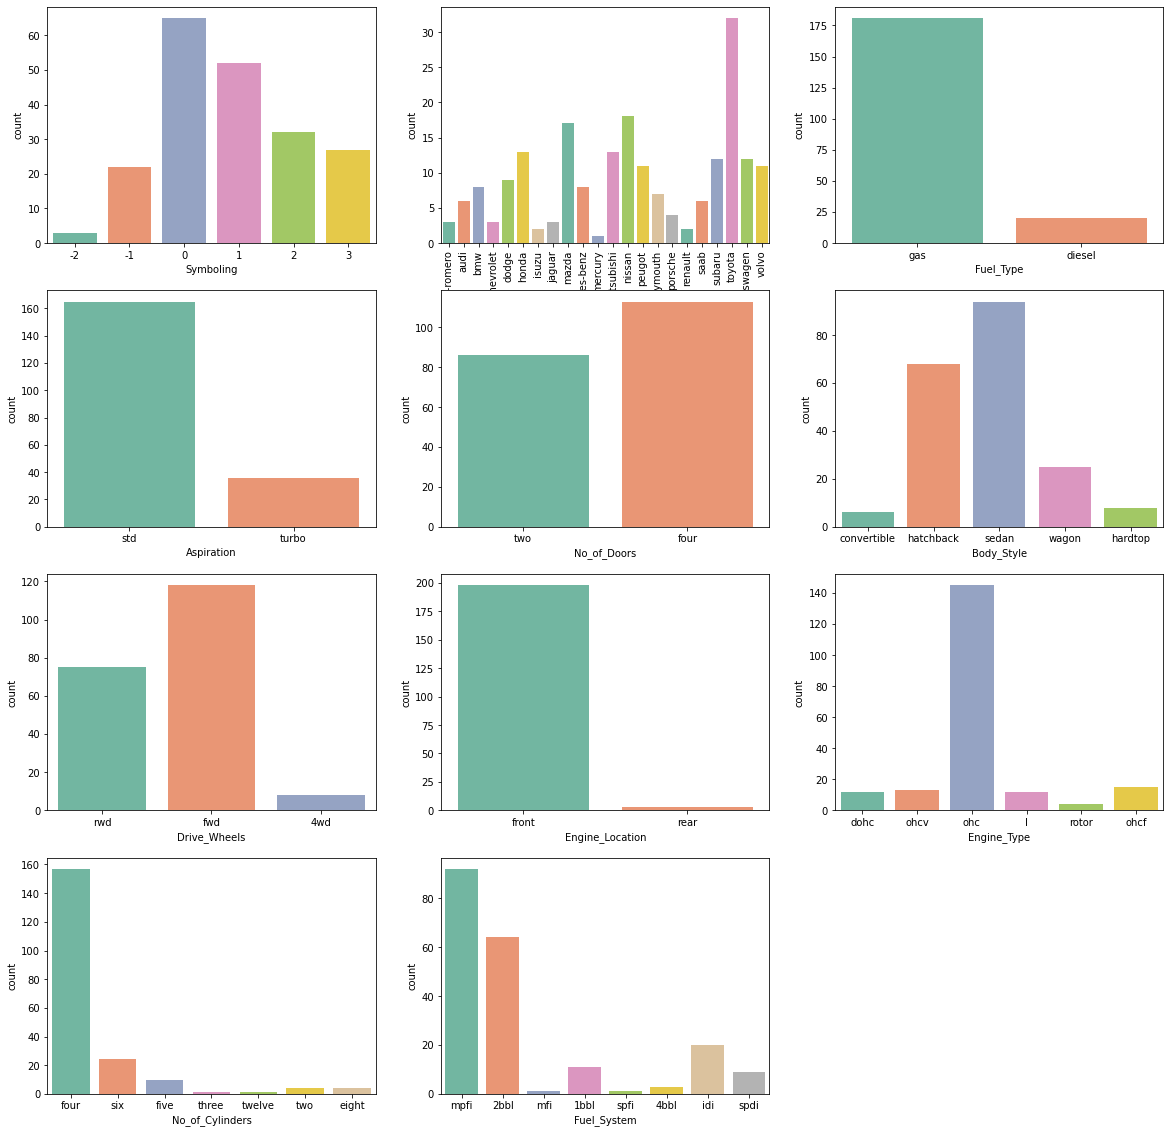

In [25]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df1:
    plt.subplot(4,3,plotnumber)
    sns.countplot(x=df[i],palette='Set2')
    if len(df[i].unique()) > 15:
        plt.xticks(rotation = 90)
    plotnumber += 1
plt.tight_layout

#### Insight:
    
**1. Symboling:**
- More than 50% of the dataset falls under the 0 and 1 categories, representing medium insurance risk.

**2. Make:**
- The dataset contains 22 distinct car brands, with Toyota representing 16% of the total car count, the highest among all brands.

**3. Fuel Type:**
- 90% of the cars in the dataset use gasoline as their fuel type.

**4. Aspiration:**
- 18% of the cars in the dataset are turbocharged.

**5. Number of Doors:**
- 57% of the cars in the dataset have four doors.

**6. Body Style:**
- The dataset includes 5 distinct body styles, with 47% of the cars classified as sedans.

**7. Drive Wheels:**
- The dataset features 3 distinct types of drive wheels, with 59% of the cars having front-wheel drive.

**8. Engine Location:**
- A majority of the cars (198) have their engine located at the front.

**9. Engine Type:**
- The dataset contains 6 distinct engine types, with 72% of the cars using the Overhead Cam (OHC) engine type.

**10. Number of Cylinders:**
- 78% of the cars in the dataset have 4-cylinder engines.

**11. Fuel System:**
- 42% of the cars in the dataset are equipped with a Multi-Point Fuel Injection (MPFi) fuel system.

In [26]:
cat_col

['Symboling',
 'Make',
 'Fuel_Type',
 'Aspiration',
 'No_of_Doors',
 'Body_Style',
 'Drive_Wheels',
 'Engine_Location',
 'Engine_Type',
 'No_of_Cylinders',
 'Fuel_System']

#### 3.1.2 Continuous Columns

In [27]:
cont_col=[]
for i in df:
    if len(df[i].unique()) > 22:
        
        cont_col.append(i)

In [28]:
df2 = df[cont_col]
df2.drop('Price',axis=1, inplace = True)

In [29]:
df2.columns

Index(['Normalized_Losses', 'Wheel_Base', 'Length', 'Width', 'Height',
       'Curb_Weight', 'Engine_Size', 'Bore', 'Stroke', 'Compression_ratio',
       'Horsepower', 'Peak_RPM', 'City_mpg', 'Highway_mpg'],
      dtype='object')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

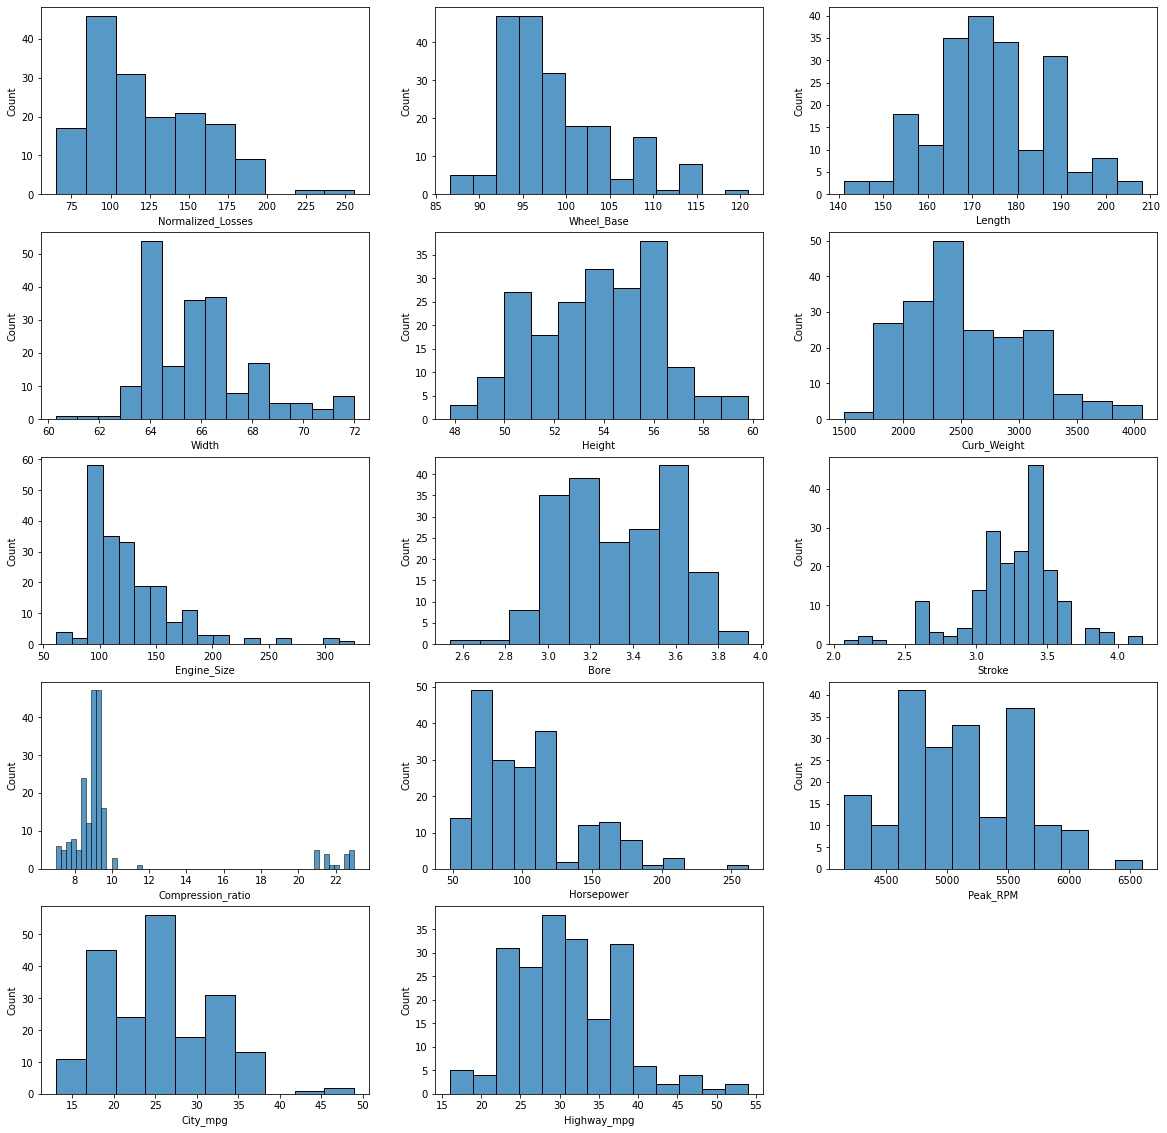

In [30]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df2:
    plt.subplot(5,3,plotnumber)
    sns.histplot(x=df[i])
    plotnumber += 1
plt.tight_layout

#### Insight:

**1. Normalized Losses:**
- The graph is not normally distributed.
- The distribution is moderately positively skewed.
- The peak is lower and broader, with fewer extreme outliers.

**2. Wheel Base:**
- The histogram shows a right-skewed, relatively flat distribution.
- Most values are concentrated between the 90s to mid-90s.
- A few higher values (over 110 or near 120) push the tail to the right.
- The distribution is not normal but also not heavy-tailed—extreme values exist but are infrequent.

**3. Length:**
- The histogram has a bell-shaped appearance, close to normal, but slightly stretched on the right.
- No major outliers or heavy tails; the data is well-distributed with a center around 173–174.
- This is considered a healthy, stable distribution.

**4. Width:**
- The distribution is mildly right-skewed and not heavily peaked.
- Most values are between 60 and 68, with a small group extending to 72.
- The histogram suggests a slightly asymmetric but stable distribution, close to normal in shape.

**5. Height:**
- The histogram is very close to a normal distribution, with balanced data around the center (54).
- Slightly flat and spread out due to negative kurtosis, but no significant skew or extreme values.

**6. Curb Weight:**
- The distribution is almost normal in shape, with a slight right skew caused by higher values.
- Most data lies between 1500 and 2800, but some entries extend above 4000, pulling the mean upward.
- This results in generally well-distributed data, but with a slight asymmetry.

**7. Engine Size:**
- The histogram is sharply peaked, right-skewed, and heavy-tailed.
- Most data lies just above the minimum (61) up to around 130, with the median at 120.
- A small number of high values (e.g., above 200, possibly up to 326) are outliers, significantly impacting the mean.

**8. Bore:**
- This is a well-behaved, almost normal distribution.
- The only deviation from normality is a slightly more spread-out, less peaked shape.
- This column contains 4 missing values.

**9. Stroke:**
- The histogram is moderately left-skewed, with most values on the higher end, but a few lower values pull the tail leftward.
- The distribution is reasonably well-behaved, with no heavy outliers and a shape close to normal, albeit skewed.

**10. Compression Ratio:**
- The distribution is heavily right-skewed, with a few very large values creating a long right tail.
- The kurtosis suggests these outliers are part of a distinct subgroup in the data.
- Most data points cluster between 7.0 and 9.0, but outliers or extreme values push the mean higher.

**11. Horsepower:**
- The distribution is moderately right-skewed (due to a skewness of 1.14), with most values clustered toward the lower end (around 95), but a few higher values stretch the right tail.
- Kurtosis suggests a relatively flat distribution compared to a normal distribution, with no extreme outliers.
- The median (95) is lower than the mean (103), confirming the presence of larger values pulling the mean up.

**12. Peak RPM:**
- The distribution is slightly right-skewed, but this is not very pronounced.
- The mean and median are very close, suggesting the data is well-behaved with no extreme distortions.
- The kurtosis suggests a distribution close to normal, with no extreme outliers or heavy tails.
- Most data likely lies in the middle range between the minimum (4150) and maximum (6600), with most values clustered around 5200.

**13. City MPG:**
- The histogram is moderately right-skewed, with more values toward the lower end (closer to 13), but a few higher values (up to 49) stretch the right tail.
- The mean (25.2) is slightly higher than the median (24), confirming the right skew.
- The kurtosis suggests a distribution with a broader peak and lighter tails.

**14. Highway MPG:**
- The distribution is moderately right-skewed, meaning the data is mostly concentrated in the lower-to-middle range (around 30), but a few higher values push the mean slightly higher than the median.
- The kurtosis of 0.561 indicates a flatter distribution compared to a normal curve, suggesting fewer extreme values.
- Most data likely falls between 16.0 and 30.0, with a few outliers or higher values up to 54.0.



In [31]:
cont_col

['Normalized_Losses',
 'Wheel_Base',
 'Length',
 'Width',
 'Height',
 'Curb_Weight',
 'Engine_Size',
 'Bore',
 'Stroke',
 'Compression_ratio',
 'Horsepower',
 'Peak_RPM',
 'City_mpg',
 'Highway_mpg',
 'Price']

### 3.2 Bivarient

#### 3.2.1 Categorical Columns

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

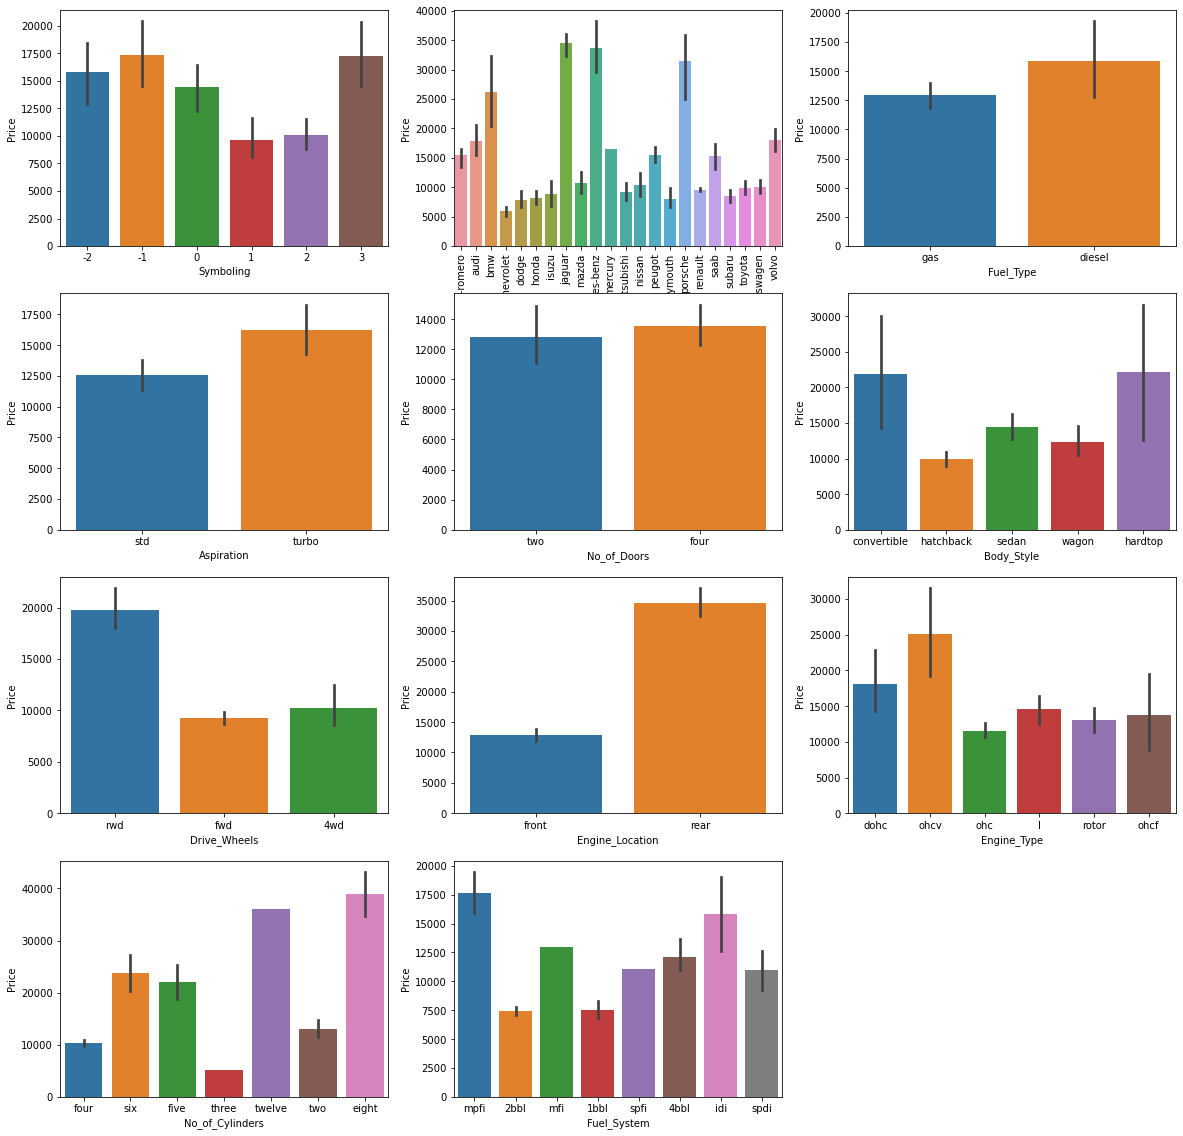

In [32]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df1:
    plt.subplot(4,3,plotnumber)
    sns.barplot(x=df[i], y= df.Price)
    if len(df[i].unique()) > 15:
        plt.xticks(rotation = 90)
    plotnumber += 1
plt.tight_layout

### Insight:
    
**1. Symboling vs Price**
- Higher symboling values generally correspond to lower car prices.
- This suggests a possible negative risk-based perception.

**2. Make vs Price**
- Manufacturers like Jaguar, Mercedes-Benz, Porsche, and BMW produce premium vehicles.
- These brands are reflected in the higher price points.

**3. Fuel Type vs Price**
- Diesel-powered vehicles are priced higher than petrol vehicles in the dataset.

**4. Aspiration vs Price**
- Cars with standard aspiration systems tend to be more affordable.
- Turbocharged engines are associated with higher prices.

**5. Number of Doors vs Price**
- There is no significant price difference between two-door and four-door cars.

**6. Body Style vs Price**
- Convertible and hardtop body styles are generally more expensive.
- Sedans, hatchbacks, and other body styles are typically priced lower.

**7. Drive Wheels vs Price**
- Rear-wheel drive (RWD) cars tend to cost more.
- This is likely due to the increased engineering complexity compared to FWD and 4WD.

**8. Engine Location vs Price**
- Front-mounted engine cars are generally less expensive.
- Rear-engine configurations are associated with higher costs.

**9. Engine Type vs Price**
- Overhead camshaft engines with variable valve timing command higher prices.
- Other engine types tend to be more affordable.

**10. Number of Cylinders vs Price**
- Cars with fewer engine cylinders tend to be cheaper.
- Simpler construction and lower material use may contribute to this.

**11. Fuel System vs Price**
- Multi-point fuel injection (MPFI) and indirect injection (IDI) systems are linked to higher car prices.
- Other fuel systems are comparatively less expensive.

#### 3.2.2 Continuous Columns

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

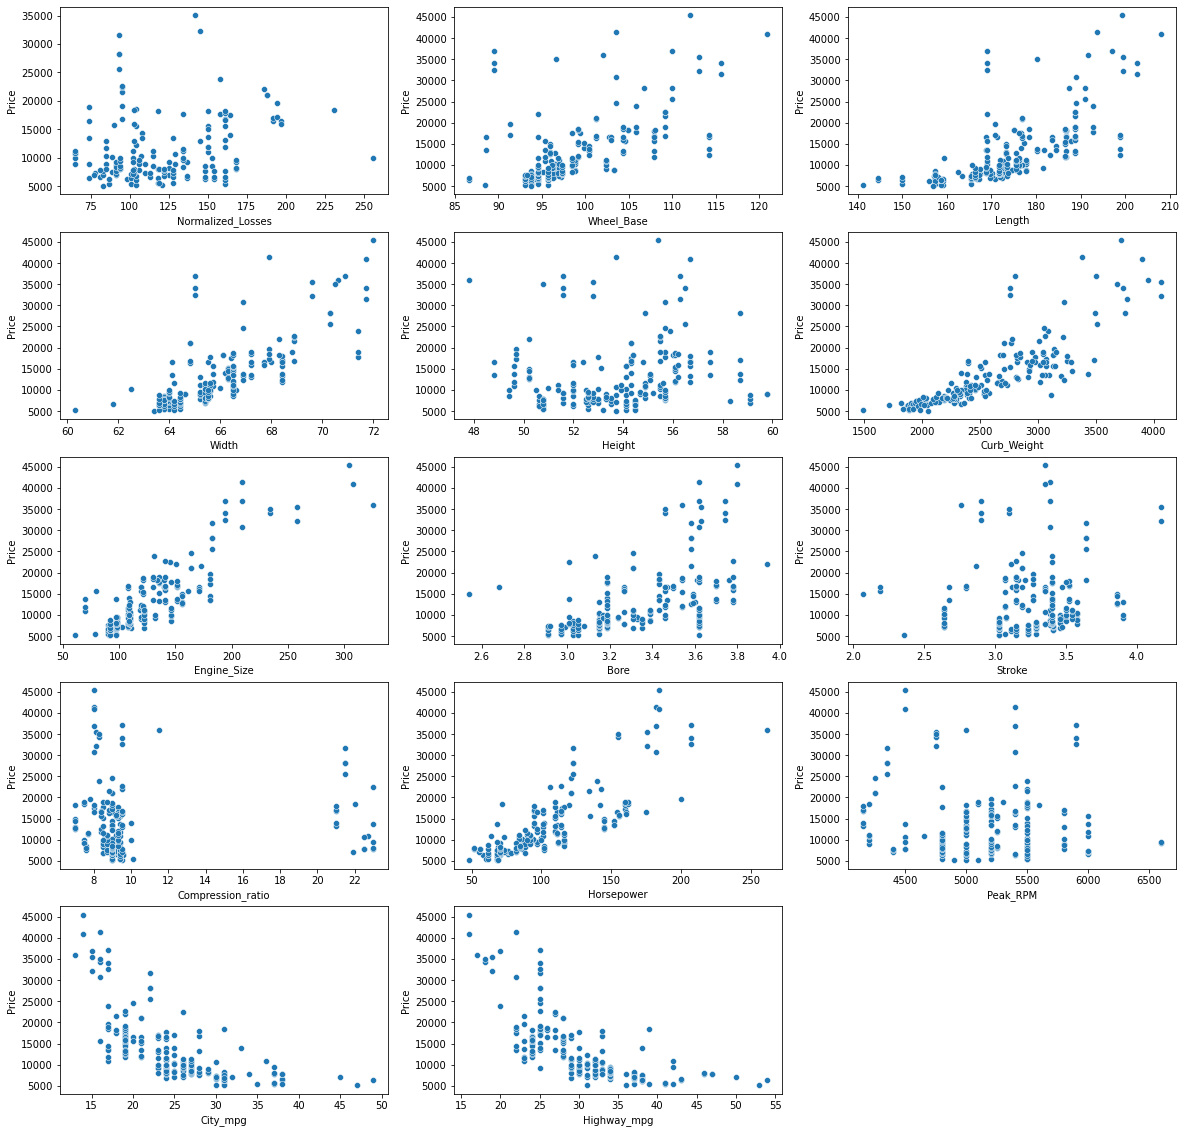

In [33]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df2:
    plt.subplot(5,3,plotnumber)
    sns.scatterplot(x = df[i] , y = df.Price)
    plotnumber += 1
plt.tight_layout

#### Insight:
    
**1. Normalized Losses vs Price**
- A slight negative correlation is observed.
- Higher normalized losses may indicate higher risk or repair cost, often correlating with lower price.

**2. Wheel Base vs Price**
- Positive correlation exists.
- Cars with a longer wheelbase tend to be more expensive, possibly due to increased cabin space and comfort.

**3. Length vs Price**
- Generally, longer cars are priced higher.
- Length often correlates with luxury and size category of the vehicle.

**4. Width vs Price**
- A wider body tends to be associated with premium car segments.
- Positive relationship with price is observed.

**5. Height vs Price**
- Weak or no clear correlation with price.
- Car height alone does not significantly impact pricing.

**6. Curb Weight vs Price**
- Strong positive correlation.
- Heavier cars typically come with more features, stronger engines, or luxury equipment, leading to higher prices.

**7. Engine Size vs Price**
- Strong positive correlation.
- Larger engine size directly relates to better performance and thus higher cost.

**8. Bore vs Price**
- Moderate positive correlation.
- Bigger bore (cylinder width) generally aligns with more powerful engines and higher price.

**9. Stroke vs Price**
- Weak positive or no significant correlation.
- Stroke length doesn’t consistently influence price across all models.

**10. Compression Ratio vs Price**
- Slight positive correlation in some cases.
- High compression ratios can mean better engine efficiency or performance, but impact on price is limited.

**11. Horsepower vs Price**
- Strong positive correlation.
- More powerful engines (higher HP) are commonly found in costlier vehicles.

**12. Peak RPM vs Price**
- Weak or inconsistent correlation.
- RPM alone doesn't significantly influence the car's price.

**13. City MPG vs Price**
- Negative correlation.
- Higher fuel efficiency (MPG) is often seen in cheaper, smaller cars.

**14. Highway MPG vs Price**
- Negative correlation.
- Like city MPG, more efficient cars are often more affordable, while performance cars trade efficiency for power.


In [34]:
#!pip install sweetviz

In [35]:
import sweetviz as sv

In [36]:
my_report = sv.analyze(df)
my_report.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 4. Data preprocessing

### 4.1 null value

In [37]:
df.isnull().sum()

Symboling             0
Normalized_Losses    37
Make                  0
Fuel_Type             0
Aspiration            0
No_of_Doors           2
Body_Style            0
Drive_Wheels          0
Engine_Location       0
Wheel_Base            0
Length                0
Width                 0
Height                0
Curb_Weight           0
Engine_Type           0
No_of_Cylinders       0
Engine_Size           0
Fuel_System           0
Bore                  4
Stroke                4
Compression_ratio     0
Horsepower            2
Peak_RPM              2
City_mpg              0
Highway_mpg           0
Price                 0
dtype: int64

In [38]:
df.Normalized_Losses = df.Normalized_Losses.fillna(df.Normalized_Losses.mean())

In [39]:
df.No_of_Doors = df.No_of_Doors.fillna(df.No_of_Doors.mode()[0])
df.No_of_Doors

0       two
1       two
2       two
3      four
4      four
       ... 
196    four
197    four
198    four
199    four
200    four
Name: No_of_Doors, Length: 201, dtype: object

In [40]:
df.Bore = df.Bore.fillna(df.Bore.median())

In [41]:
df.Stroke = df.Stroke.fillna(df.Stroke.median())

In [42]:
df.Horsepower = df.Horsepower.fillna(df.Horsepower.median())

In [43]:
df.Peak_RPM = df.Peak_RPM.fillna(df.Peak_RPM.mean())

In [44]:
df.isnull().sum()

Symboling            0
Normalized_Losses    0
Make                 0
Fuel_Type            0
Aspiration           0
No_of_Doors          0
Body_Style           0
Drive_Wheels         0
Engine_Location      0
Wheel_Base           0
Length               0
Width                0
Height               0
Curb_Weight          0
Engine_Type          0
No_of_Cylinders      0
Engine_Size          0
Fuel_System          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_RPM             0
City_mpg             0
Highway_mpg          0
Price                0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          201 non-null    int64  
 1   Normalized_Losses  201 non-null    float64
 2   Make               201 non-null    object 
 3   Fuel_Type          201 non-null    object 
 4   Aspiration         201 non-null    object 
 5   No_of_Doors        201 non-null    object 
 6   Body_Style         201 non-null    object 
 7   Drive_Wheels       201 non-null    object 
 8   Engine_Location    201 non-null    object 
 9   Wheel_Base         201 non-null    float64
 10  Length             201 non-null    float64
 11  Width              201 non-null    float64
 12  Height             201 non-null    float64
 13  Curb_Weight        201 non-null    int64  
 14  Engine_Type        201 non-null    object 
 15  No_of_Cylinders    201 non-null    object 
 16  Engine_Size        201 non

In [46]:
df.Aspiration.value_counts()

std      165
turbo     36
Name: Aspiration, dtype: int64

In [47]:
df.Body_Style.value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: Body_Style, dtype: int64

### 4.2 Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [49]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df.Make = lb.fit_transform(df.Make)


In [50]:
df.Fuel_Type = lb.fit_transform(df.Fuel_Type)

In [51]:
df.Aspiration = lb.fit_transform(df.Aspiration)

In [52]:
df.No_of_Doors	 = lb.fit_transform(df.No_of_Doors)

In [53]:
df.Body_Style= lb.fit_transform(df.Body_Style)

In [54]:
df.Drive_Wheels= lb.fit_transform(df.Drive_Wheels)

In [55]:
df.Engine_Type= lb.fit_transform(df.Engine_Type)

In [56]:
df.No_of_Cylinders = lb.fit_transform(df.No_of_Cylinders )

In [57]:
df.Fuel_System = lb.fit_transform(df.Fuel_System)

In [58]:
df.Engine_Location	= lb.fit_transform(df.Engine_Location)

In [59]:
df.Fuel_System = lb.fit_transform(df.Fuel_System)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          201 non-null    int64  
 1   Normalized_Losses  201 non-null    float64
 2   Make               201 non-null    int32  
 3   Fuel_Type          201 non-null    int32  
 4   Aspiration         201 non-null    int32  
 5   No_of_Doors        201 non-null    int32  
 6   Body_Style         201 non-null    int32  
 7   Drive_Wheels       201 non-null    int32  
 8   Engine_Location    201 non-null    int32  
 9   Wheel_Base         201 non-null    float64
 10  Length             201 non-null    float64
 11  Width              201 non-null    float64
 12  Height             201 non-null    float64
 13  Curb_Weight        201 non-null    int64  
 14  Engine_Type        201 non-null    int32  
 15  No_of_Cylinders    201 non-null    int32  
 16  Engine_Size        201 non

### 4.3 Duplicated value

In [63]:
df.duplicated().sum()

0

### 4.4 Outliers

In [64]:
df.columns

Index(['Symboling', 'Normalized_Losses', 'Make', 'Fuel_Type', 'Aspiration',
       'No_of_Doors', 'Body_Style', 'Drive_Wheels', 'Engine_Location',
       'Wheel_Base', 'Length', 'Width', 'Height', 'Curb_Weight', 'Engine_Type',
       'No_of_Cylinders', 'Engine_Size', 'Fuel_System', 'Bore', 'Stroke',
       'Compression_ratio', 'Horsepower', 'Peak_RPM', 'City_mpg',
       'Highway_mpg', 'Price'],
      dtype='object')

In [65]:
df1 = df[cat_col]
df1

,Symboling,Make,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Engine_Type,No_of_Cylinders,Fuel_System
0,3,0,1,0,1,0,2,0,0,2,5
1,3,0,1,0,1,0,2,0,0,2,5
2,1,0,1,0,1,2,2,0,4,3,5
3,2,1,1,0,0,3,1,0,2,2,5
4,2,1,1,0,0,3,0,0,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...
196,-1,21,1,0,0,3,2,0,2,2,5
197,-1,21,1,1,0,3,2,0,2,2,5
198,-1,21,1,0,0,3,2,0,4,3,5
199,-1,21,0,1,0,3,2,0,2,3,3


In [66]:
df2 = df[cont_col]
df2

,Normalized_Losses,Wheel_Base,Length,Width,Height,Curb_Weight,Engine_Size,Bore,Stroke,Compression_ratio,Horsepower,Peak_RPM,City_mpg,Highway_mpg,Price
0,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

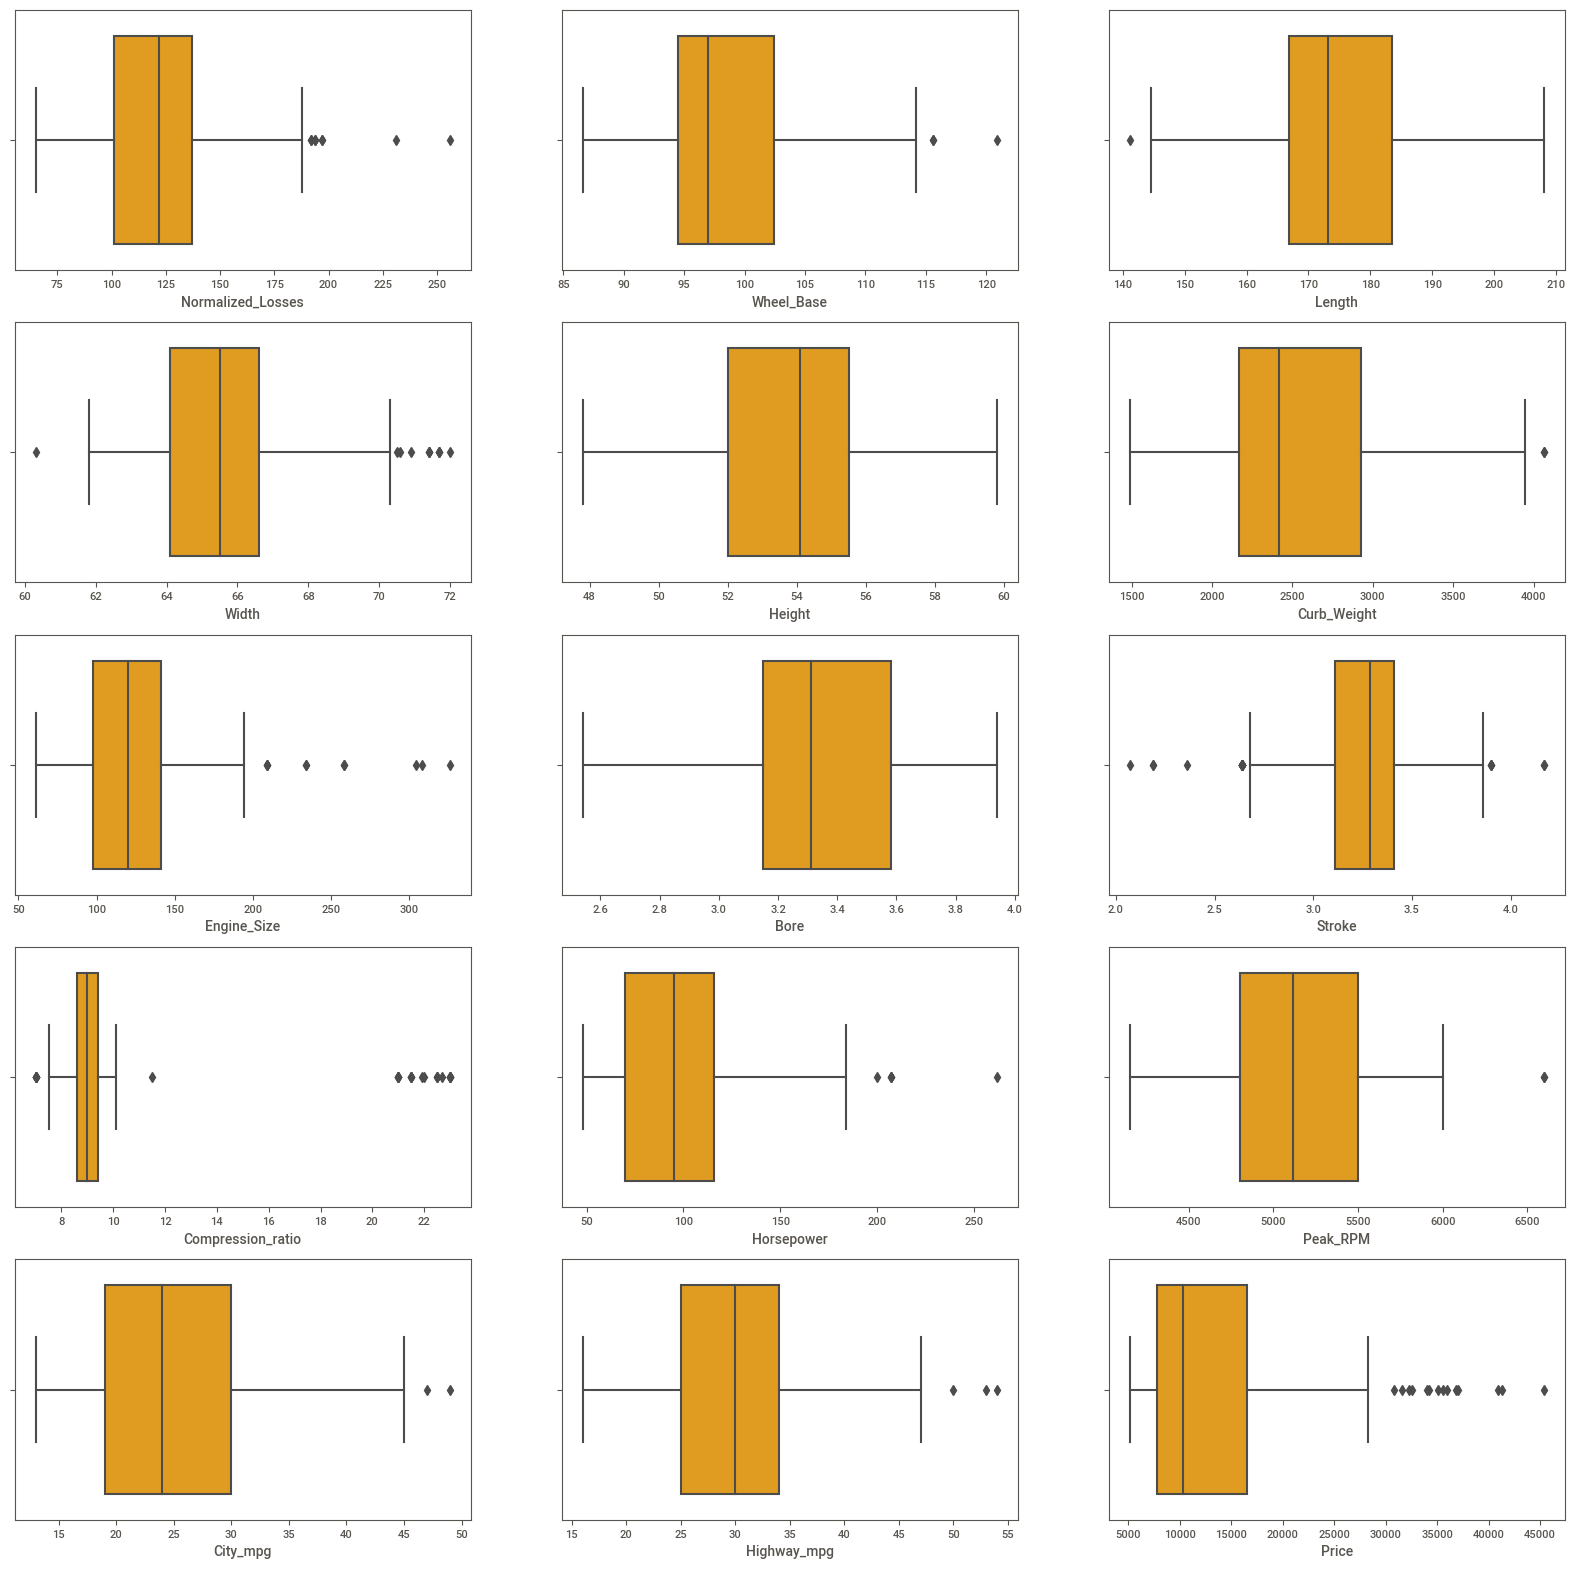

In [67]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df2:
    plt.subplot(5,3,plotnumber)
    sns.boxplot(x=df[i], color='orange')
    plotnumber = plotnumber +  1
plt.tight_layout

In [68]:
def compute_stats(df2):
    stats_df2 = df2.describe().T
    stats_df2['Q1'] = df2.quantile(0.25)
    stats_df2['Q3'] = df2.quantile(0.75)
    stats_df2['IQR'] = stats_df2['75%'] - stats_df2['25%']
    stats_df2['LL'] = stats_df2['Q1'] - 1.5 * stats_df2['IQR']
    stats_df2['UL'] = stats_df2['Q3'] + 1.5 * stats_df2['IQR']

    LI = {}  # Initialize as dictionary
    UL = {}

    for col in df2.columns:
        LI[col] = (df2[col] < stats_df2.loc[col, 'LL']).sum()
        UL[col] = (df2[col] > stats_df2.loc[col, 'UL']).sum()

    # Optionally include LI and UL in stats_df2 if needed:
    stats_df2['Lower_Outliers'] = pd.Series(LI)
    stats_df2['Upper_Outliers'] = pd.Series(UL)

    return stats_df2
    
result = compute_stats(df2)
print(result)

                   count          mean          std      min      25%  \
Normalized_Losses  201.0    122.000000    31.996250    65.00   101.00   
Wheel_Base         201.0     98.797015     6.066366    86.60    94.50   
Length             201.0    174.200995    12.322175   141.10   166.80   
Width              201.0     65.889055     2.101471    60.30    64.10   
Height             201.0     53.766667     2.447822    47.80    52.00   
Curb_Weight        201.0   2555.666667   517.296727  1488.00  2169.00   
Engine_Size        201.0    126.875622    41.546834    61.00    98.00   
Bore               201.0      3.330299     0.268088     2.54     3.15   
Stroke             201.0      3.257562     0.316082     2.07     3.11   
Compression_ratio  201.0     10.164279     4.004965     7.00     8.60   
Horsepower         201.0    103.313433    37.374942    48.00    70.00   
Peak_RPM           201.0   5117.587940   478.113178  4150.00  4800.00   
City_mpg           201.0     25.179104     6.423220

In [69]:
from scipy import stats

In [70]:
#Normalized Losses
IQR1 = stats.iqr(df.Normalized_Losses)
Q11 = df.Normalized_Losses.quantile(0.25)
Q31 = df.Normalized_Losses.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.Normalized_Losses > UL,'Normalized_Losses'] = df.Normalized_Losses.median()

<AxesSubplot:xlabel='Normalized_Losses'>

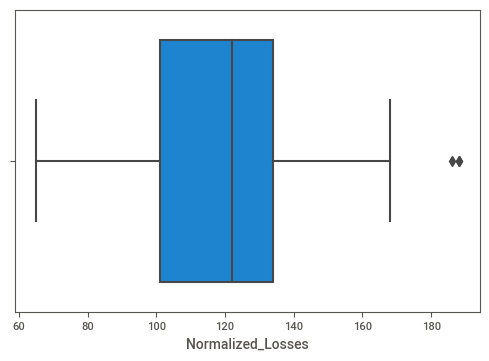

In [71]:
sns.boxplot(x=df.Normalized_Losses)

In [72]:
#Wheel_Base
IQR1 = stats.iqr(df.Wheel_Base)
Q11 = df.Wheel_Base.quantile(0.25)
Q31 = df.Wheel_Base.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.Wheel_Base > UL,'Wheel_Base'] = df.Wheel_Base.median()

In [73]:
#Wheel_Base
IQR1 = stats.iqr(df.Wheel_Base)
Q11 = df.Wheel_Base.quantile(0.25)
Q31 = df.Wheel_Base.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.Wheel_Base > UL,'Wheel_Base'] = df.Wheel_Base.median()

In [74]:
#Length
IQR1 = stats.iqr(df.Length)
Q11 = df.Length.quantile(0.25)
Q31 = df.Length.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.Length < LL,'Length'] = df.Length.median()

In [75]:
#Width
IQR1 = stats.iqr(df.Width)
Q11 = df.Width.quantile(0.25)
Q31 = df.Width.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.Width > UL,'Width'] = df.Width.median()
df.loc[df.Width < LL,'Width'] = df.Width.median()

In [76]:
df.columns

Index(['Symboling', 'Normalized_Losses', 'Make', 'Fuel_Type', 'Aspiration',
       'No_of_Doors', 'Body_Style', 'Drive_Wheels', 'Engine_Location',
       'Wheel_Base', 'Length', 'Width', 'Height', 'Curb_Weight', 'Engine_Type',
       'No_of_Cylinders', 'Engine_Size', 'Fuel_System', 'Bore', 'Stroke',
       'Compression_ratio', 'Horsepower', 'Peak_RPM', 'City_mpg',
       'Highway_mpg', 'Price'],
      dtype='object')

In [77]:
#Curb_Weight
IQR1 = stats.iqr(df.Curb_Weight)
Q11 = df.Curb_Weight.quantile(0.25)
Q31 = df.Curb_Weight.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.Curb_Weight > UL,'Curb_Weight'] = df.Curb_Weight.median()

In [78]:
#Engine_Size
IQR1 = stats.iqr(df.Engine_Size)
Q11 = df.Engine_Size.quantile(0.25)
Q31 = df.Engine_Size.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.Engine_Size > UL,'Engine_Size'] = df.Engine_Size.median()

In [79]:
#Stroke
IQR1 = stats.iqr(df.Stroke)
Q11 = df.Stroke.quantile(0.25)
Q31 = df.Stroke.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.Stroke > UL,'Stroke'] = df.Stroke.median()
df.loc[df.Stroke < LL,'Stroke'] = df.Stroke.median()

In [80]:
#Compression_ratio
IQR1 = stats.iqr(df.Compression_ratio)
Q11 = df.Compression_ratio.quantile(0.25)
Q31 = df.Compression_ratio.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.Compression_ratio > UL,'Compression_ratio'] = df.Compression_ratio.median()
df.loc[df.Compression_ratio < LL,'Compression_ratio'] = df.Compression_ratio.median()

In [81]:
#Horsepower
IQR1 = stats.iqr(df.Horsepower)
Q11 = df.Horsepower.quantile(0.25)
Q31 = df.Horsepower.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.Horsepower > UL,'Horsepower'] = df.Horsepower.median()


In [82]:
#Peak_RPM
IQR1 = stats.iqr(df.Peak_RPM)
Q11 = df.Peak_RPM.quantile(0.25)
Q31 = df.Peak_RPM.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.Peak_RPM > UL,'Peak_RPM'] = df.Peak_RPM.median()


In [83]:
#City_mpg
IQR1 = stats.iqr(df.City_mpg)
Q11 = df.City_mpg.quantile(0.25)
Q31 = df.City_mpg.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.City_mpg > UL,'City_mpg'] = df.City_mpg.median()


In [84]:
#Highway_mpg
IQR1 = stats.iqr(df.Highway_mpg)
Q11 = df.Highway_mpg.quantile(0.25)
Q31 = df.Highway_mpg.quantile(0.75)

UL = Q31 + (1.5*IQR1)
LL = Q11 - (1.5*IQR1)

df.loc[df.Highway_mpg > UL,'Highway_mpg'] = df.Highway_mpg.median()


### 4.5 Scaling

In [86]:
df

,Symboling,Normalized_Losses,Make,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,...,Engine_Size,Fuel_System,Bore,Stroke,Compression_ratio,Horsepower,Peak_RPM,City_mpg,Highway_mpg,Price
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,9.0,106.0,4800.0,26,27,22470


In [87]:
df2.drop('Price', axis=1, inplace=True)

In [88]:
df2.columns

Index(['Normalized_Losses', 'Wheel_Base', 'Length', 'Width', 'Height',
       'Curb_Weight', 'Engine_Size', 'Bore', 'Stroke', 'Compression_ratio',
       'Horsepower', 'Peak_RPM', 'City_mpg', 'Highway_mpg'],
      dtype='object')

In [89]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [90]:
#keeping original dataset before scaling
dfOG = df

In [91]:
for i in df2:
    df[i] = ms.fit_transform(df[[i]])

In [92]:
df

,Symboling,Normalized_Losses,Make,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,...,Engine_Size,Fuel_System,Bore,Stroke,Compression_ratio,Horsepower,Peak_RPM,City_mpg,Highway_mpg,Price
0,3,0.463415,0,1,0,1,0,2,0,0.085470,...,0.518797,5,0.664286,0.000000,0.576923,0.463235,0.459459,0.25000,0.354839,13495
1,3,0.463415,0,1,0,1,0,2,0,0.085470,...,0.518797,5,0.664286,0.000000,0.576923,0.463235,0.459459,0.25000,0.354839,16500
2,1,0.463415,0,1,0,1,2,2,0,0.337607,...,0.684211,5,0.100000,0.669492,0.576923,0.779412,0.459459,0.18750,0.322581,16500
3,2,0.804878,1,1,0,0,3,1,0,0.564103,...,0.360902,5,0.464286,0.610169,0.961538,0.397059,0.729730,0.34375,0.451613,13950
4,2,0.804878,1,1,0,0,3,0,0,0.547009,...,0.563910,5,0.464286,0.610169,0.192308,0.492647,0.729730,0.15625,0.193548,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,0.243902,21,1,0,0,3,2,0,0.961538,...,0.601504,5,0.885714,0.398305,0.769231,0.485294,0.675676,0.31250,0.387097,16845
197,-1,0.243902,21,1,1,0,3,2,0,0.961538,...,0.601504,5,0.885714,0.398305,0.461538,0.823529,0.621622,0.18750,0.290323,19045
198,-1,0.243902,21,1,0,0,3,2,0,0.961538,...,0.842105,5,0.742857,0.161017,0.500000,0.632353,0.729730,0.15625,0.225806,21485
199,-1,0.243902,21,0,1,0,3,2,0,0.961538,...,0.631579,3,0.335714,0.610169,0.576923,0.426471,0.351351,0.40625,0.354839,22470


### 4.6 Correlation

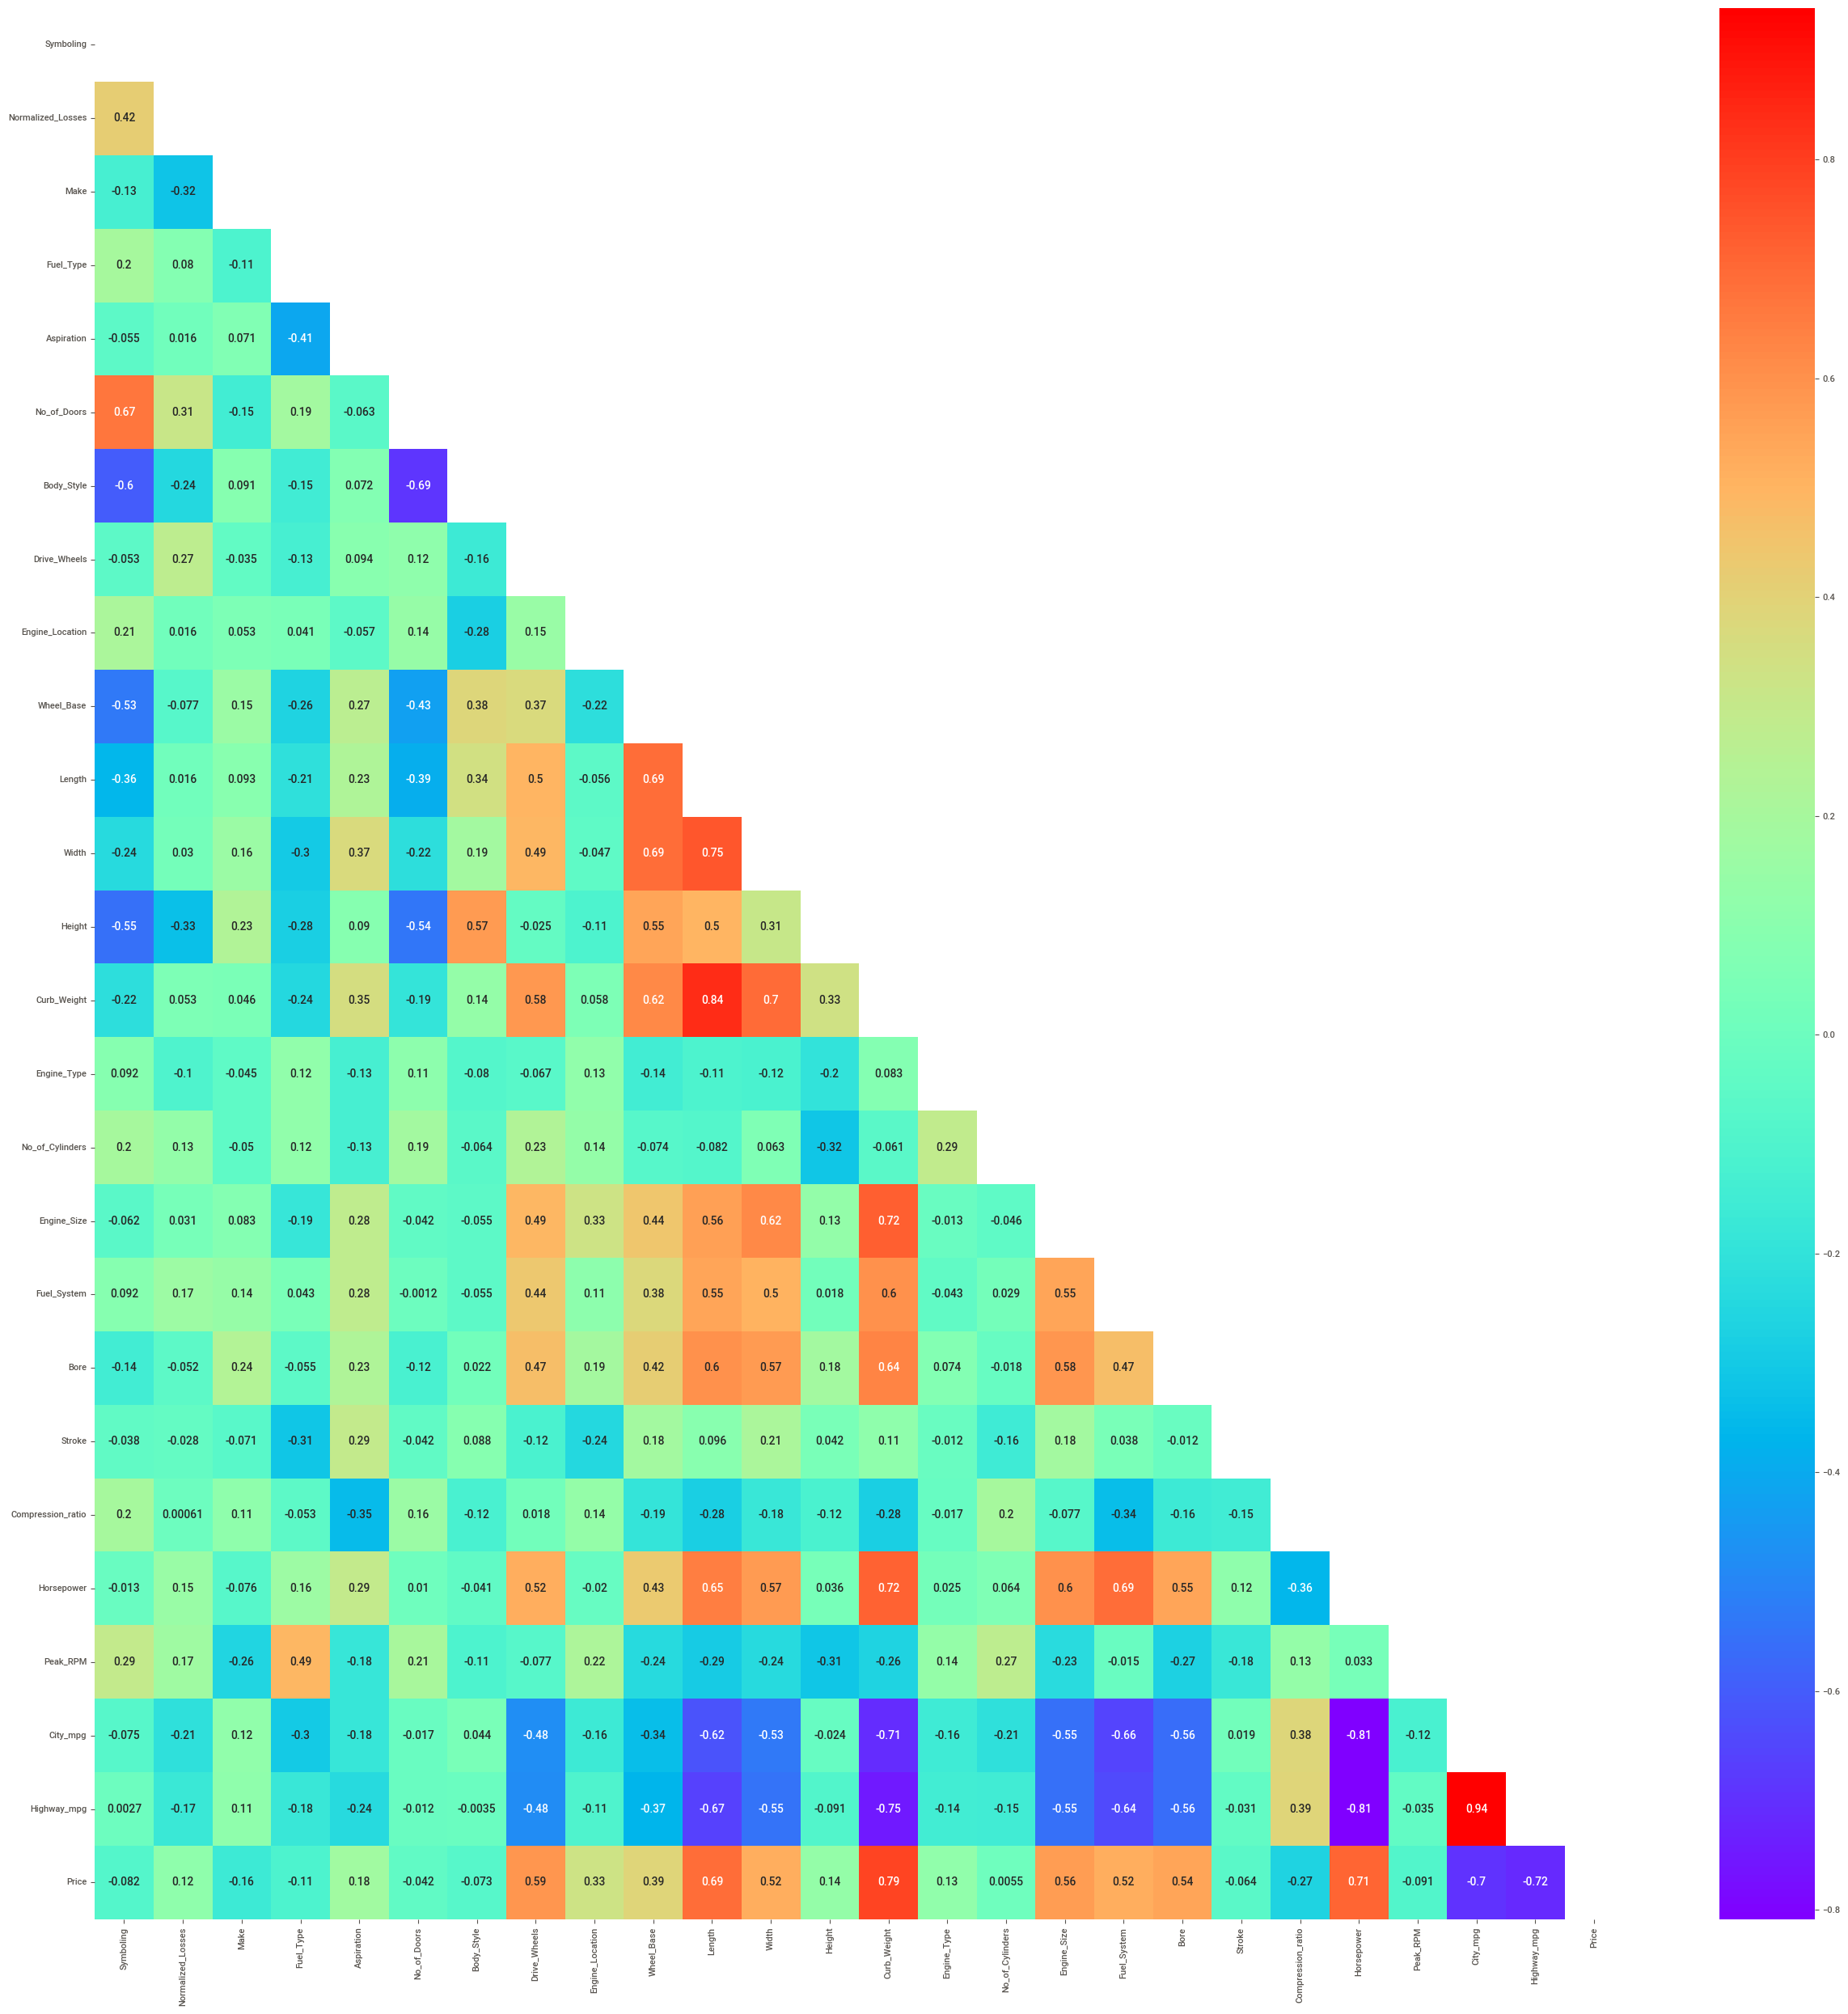

In [93]:
plt.figure(figsize = (25,25))
mymask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot = True,cmap = 'rainbow',mask = mymask)
plt.tight_layout()
plt.show()

In [94]:
#Since Highway_mpg and City_mpg are highly correlated

In [95]:
df.drop('Highway_mpg', axis=1, inplace=True)

# 5. Model Creation

### 5.1 Defining x and y

In [96]:
x = df.drop('Price', axis=1)
x

,Symboling,Normalized_Losses,Make,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,...,Engine_Type,No_of_Cylinders,Engine_Size,Fuel_System,Bore,Stroke,Compression_ratio,Horsepower,Peak_RPM,City_mpg
0,3,0.463415,0,1,0,1,0,2,0,0.085470,...,0,2,0.518797,5,0.664286,0.000000,0.576923,0.463235,0.459459,0.25000
1,3,0.463415,0,1,0,1,0,2,0,0.085470,...,0,2,0.518797,5,0.664286,0.000000,0.576923,0.463235,0.459459,0.25000
2,1,0.463415,0,1,0,1,2,2,0,0.337607,...,4,3,0.684211,5,0.100000,0.669492,0.576923,0.779412,0.459459,0.18750
3,2,0.804878,1,1,0,0,3,1,0,0.564103,...,2,2,0.360902,5,0.464286,0.610169,0.961538,0.397059,0.729730,0.34375
4,2,0.804878,1,1,0,0,3,0,0,0.547009,...,2,1,0.563910,5,0.464286,0.610169,0.192308,0.492647,0.729730,0.15625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,0.243902,21,1,0,0,3,2,0,0.961538,...,2,2,0.601504,5,0.885714,0.398305,0.769231,0.485294,0.675676,0.31250
197,-1,0.243902,21,1,1,0,3,2,0,0.961538,...,2,2,0.601504,5,0.885714,0.398305,0.461538,0.823529,0.621622,0.18750
198,-1,0.243902,21,1,0,0,3,2,0,0.961538,...,4,3,0.842105,5,0.742857,0.161017,0.500000,0.632353,0.729730,0.15625
199,-1,0.243902,21,0,1,0,3,2,0,0.961538,...,2,3,0.631579,3,0.335714,0.610169,0.576923,0.426471,0.351351,0.40625


In [97]:
y = df.Price
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
196    16845
197    19045
198    21485
199    22470
200    22625
Name: Price, Length: 201, dtype: int64

### 5.2 Applying Test Train Split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [100]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 24)
(61, 24)
(140,)
(61,)


In [101]:
y_test

95      8249
15     41315
30      6855
158     9258
128    11850
       ...  
140     9233
98     13499
173    11248
96      8949
170    10698
Name: Price, Length: 61, dtype: int64

### 5.3 Applying ML Models

### 5.3.1 Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [103]:
LR.fit(x_train, y_train)

LinearRegression()

In [104]:
y_pred = LR.predict(x_test)
y_pred

array([ 6070.39711224, 29931.90349106,  1407.23078436,  7987.93976302,
       14881.25043224,  4542.27999836, 36244.58136958, 12677.30342614,
       16623.7378613 , 21811.54000322, 24697.20563586,  9613.88434737,
       11817.51494607, 10714.98996238, 12526.39157946,  8268.14680894,
       11805.15828479,  7304.50863337,  9524.72369074, 35823.52303204,
       32528.        , 32099.24488335,  6317.94292238,  4884.14746143,
       24040.90616444, 11431.57772592, 11276.97874629, 24348.79068441,
       33487.22419522, 16310.95524849, 16525.40893592,  7094.05134732,
       17711.55418933,  5699.56241343,  6055.34324326, 18064.38834145,
        6655.76488307,  8177.13007442, 12413.27946974,  7322.47259603,
       13270.90713623, 18266.75448677,  9384.01485091,  6725.40890744,
       13271.92534778, 16544.94273107,  2942.09442651,  7174.42263096,
       10602.35145067,  4336.20909108, 18512.01258331, 16253.6766978 ,
       16041.82488412,  9133.08464028,  5055.8721455 ,  4427.88677853,
      

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [106]:
mse = mean_squared_error(y_test, y_pred)
mse

11748948.100262765

In [107]:
import math
rmse = math.sqrt(mse)
rmse

3427.673861420127

In [108]:
y_pred_train = LR.predict(x_train)

In [109]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_train

6618887.467007535

In [110]:
rmse_train = math.sqrt(mse_train)
rmse_train

2572.7198578561824

In [111]:
mae = mean_absolute_error(y_test, y_pred)
mae

2213.3139052680376

In [112]:
r2 = r2_score(y_test, y_pred)
r2

0.8760550419818226

In [113]:
adj_r2 = 1-(1-r2)*(61-1)/(61-24-1)
adj_r2

0.7934250699697043

In [114]:
print("MSE =", mean_squared_error(y_test, y_pred))
print("RMSE =", math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE =", mean_absolute_error(y_test, y_pred))
print("R2 Score =", r2_score(y_test, y_pred))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred)))*(61-1)/(61-24-1))

MSE = 11748948.100262765
RMSE = 3427.673861420127
MAE = 2213.3139052680376
R2 Score = 0.8760550419818226
R2 Adj = 0.7934250699697043


### 5.3.2 KNN

In [115]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [116]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [117]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([ 6957. , 22865. ,  6201.2,  7597.4, 12832.8,  7209.6, 26444.2,
        9770.6, 10006.6, 18573.4, 16447.8,  9285.6,  9830.4,  7225. ,
        9765.2,  9241.6,  7985. ,  7597.4,  7987. , 27894.2, 17485.2,
       22865. ,  6996. ,  7229. , 16183.2, 14776.2, 13019.8, 16183.2,
       17485.2, 14247. , 18824. ,  6237.2, 17926.8,  7225. ,  7782. ,
       14909. ,  6529. ,  7637.4, 11769.2, 13019.8, 15103.8, 16802. ,
        8375. ,  7226.4, 17147.4, 16296. ,  6201.2,  6941.6, 10551.8,
        7189. , 14909. , 10006.6, 18381. , 12118.6,  7249.6,  7225. ,
        7953.4, 14555. ,  9770.6,  7937. ,  9875.4])

In [118]:
print("MSE =", mean_squared_error(y_test, y_pred_knn))
print("RMSE =", math.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("MAE =", mean_absolute_error(y_test, y_pred_knn))
print("R2 Score =", r2_score(y_test, y_pred_knn))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_knn)))*(61-1)/(61-24-1)) #r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

MSE = 39594908.209836066
RMSE = 6292.448506729003
MAE = 3787.9540983606553
R2 Score = 0.5822954366704571
R2 Adj = 0.3038257277840952


### 5.3.3 Decision Tree Regressor

In [119]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 11)

In [120]:

dt.fit(x_train,y_train)


DecisionTreeRegressor(random_state=11)

In [121]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([ 6692. , 30760. ,  6095. ,  8358. , 12170. ,  6849. , 30760. ,
       10898. , 15690. , 32250. , 25552. ,  7995. , 11549. ,  9960. ,
       14997.5,  7799. , 10595. ,  7738. ,  9960. , 30760. , 32528. ,
       30760. ,  6918. ,  7395. , 25552. ,  7898. ,  8189. , 25552. ,
       32528. , 12964. , 16925. ,  5572. , 30760. ,  6692. ,  6918. ,
       15985. ,  5118. ,  8358. ,  8449. ,  7957. , 14869. , 22625. ,
       10295. ,  7609. , 12764. , 18920. ,  5195. ,  6795. , 11259. ,
        6377. , 22625. , 15690. , 13950. , 14997.5,  6229. ,  6189. ,
        8013. , 13499. , 11259. ,  9549. ,  7463. ])

In [122]:
print("MSE =", mean_squared_error(y_test, y_pred_dt))
print("RMSE =", math.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("MAE =", mean_absolute_error(y_test, y_pred_dt))
print("R2 Score =", r2_score(y_test, y_pred_dt))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_dt)))*(61-1)/(61-24-1)) #r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

MSE = 12342888.827868853
RMSE = 3513.2447719834227
MAE = 2251.590163934426
R2 Score = 0.8697892930892237
R2 Adj = 0.7829821551487062


### 5.3.4 Gradient Boosting

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)


In [124]:
gb.fit(x_train,y_train)


GradientBoostingRegressor(random_state=42)

In [125]:
y_pred_gb = gb.predict(x_test)
y_pred_gb

array([ 7145.309819  , 30850.12792015,  6238.07253976,  7584.76638465,
       13244.77819585,  6338.97839072, 36318.33366203, 10916.32952555,
       17302.60695612, 31447.28962414, 23909.05317073,  8945.74669244,
       10845.22040072,  8598.50382106, 13787.36845842,  7965.17231485,
       10151.53282815,  7584.76638465,  8366.61404342, 37013.00835252,
       32111.1862399 , 34139.99327869,  6106.35996736,  7121.44649519,
       25769.49852524, 10235.17247644,  9515.67026475, 24022.94035705,
       33696.53080902, 18371.50263268, 16719.16310092,  5392.04501598,
       25783.37768155,  6627.7921101 ,  6268.82161201, 16140.55133438,
        6284.87449244,  7749.3876903 ,  9585.15039625,  8616.82056261,
       14361.22347492, 19048.58386881, 10769.65480031,  6910.38844678,
       17715.40305439, 18917.58625771,  5234.93080384,  6225.31602288,
        9720.90852139,  6622.9565989 , 16792.14919886, 17302.60695612,
       15151.10274926, 11608.40809885,  6579.18410178,  6300.99471984,
      

In [126]:
print("MSE =", mean_squared_error(y_test, y_pred_gb))
print("RMSE =", math.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("MAE =", mean_absolute_error(y_test, y_pred_gb))
print("R2 Score =", r2_score(y_test, y_pred_gb))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_gb)))*(61-1)/(61-24-1)) #r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

MSE = 7112144.4227854535
RMSE = 2666.860405567838
MAE = 1653.1678264871625
R2 Score = 0.9249707774365228
R2 Adj = 0.8749512957275379


### 5.3.5 Random Forest

In [127]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [128]:
rf.fit(x_train,y_train)


RandomForestRegressor()

In [129]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([ 7034.91      , 29605.02      ,  6073.84      ,  7995.31      ,
       13233.79      ,  6102.97      , 31939.01166667, 10575.48714286,
       17009.95      , 25301.12      , 21813.48      ,  7919.43      ,
       10864.23      ,  9200.66      , 14599.07583333,  7613.96      ,
       10224.87166667,  7544.87      ,  8740.76666667, 32684.385     ,
       25952.285     , 31424.96      ,  6489.42      ,  7192.89      ,
       23640.09      ,  9017.99      ,  9595.71      , 21475.195     ,
       25958.8075    , 16739.11      , 15259.62      ,  6250.31      ,
       22881.89      ,  6694.61      ,  7403.04      , 16180.06      ,
        6856.53      ,  7768.38      ,  9739.93      ,  8330.34      ,
       14145.62      , 21348.07      ,  9908.83      ,  7324.84      ,
       15701.105     , 19638.06      ,  5718.66      ,  6954.71      ,
       10293.27      ,  6426.07      , 17382.56      , 16873.04      ,
       14041.91833333, 12305.65583333,  6449.28      ,  6066.68      ,
      

In [130]:
print("MSE =", mean_squared_error(y_test, y_pred_rf))
print("RMSE =", math.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE =", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score =", r2_score(y_test, y_pred_rf))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_rf)))*(61-1)/(61-24-1)) #r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

MSE = 13255006.947151989
RMSE = 3640.742636764097
MAE = 2187.340587431694
R2 Score = 0.8601669472385651
R2 Adj = 0.7669449120642752


### 5.3.6 XGBoosting

In [131]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [132]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [133]:
y_pred_xgb = xgb.predict(x_test)

In [134]:
y_pred_xgb

array([ 7045.883 , 30713.357 ,  6374.8765,  8173.243 , 13236.772 ,
        5785.131 , 32933.99  , 10733.683 , 16831.86  , 32214.516 ,
       25390.926 ,  8706.832 , 10536.344 ,  8609.906 , 12867.749 ,
        8026.873 , 10596.078 ,  7866.6226,  8324.296 , 31671.12  ,
       32527.979 , 32983.54  ,  6247.3804,  7088.7974, 26533.916 ,
       11247.127 ,  9730.311 , 26854.441 , 32459.107 , 16589.947 ,
       15945.232 ,  5881.5303, 22598.998 ,  6375.24  ,  6945.67  ,
       16338.519 ,  5970.7563,  7717.6187,  8503.4   ,  8115.569 ,
       14700.408 , 21630.844 , 11612.398 ,  7599.137 , 13267.162 ,
       17837.527 ,  6062.5283,  7082.031 , 10091.33  ,  6867.4136,
       18659.508 , 16820.516 , 14264.975 , 10711.485 ,  6016.578 ,
        5998.311 ,  8058.675 , 14943.454 , 10734.842 ,  9438.945 ,
       11005.208 ], dtype=float32)

In [135]:
print("MSE =", mean_squared_error(y_test, y_pred_xgb))
print("RMSE =", math.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE =", mean_absolute_error(y_test, y_pred_xgb))
print("R2 Score =", r2_score(y_test, y_pred_xgb))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_xgb)))*(61-1)/(61-24-1)) #r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

MSE = 6472114.12036134
RMSE = 2544.035007691785
MAE = 1569.1045322105533
R2 Score = 0.9317227460627646
R2 Adj = 0.8862045767712744


### 5.4 Model Evaluation

In [136]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN" : KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=11),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
}

In [137]:
model_results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 =  r2_score(y_test, y_pred)
    model_results[name] = r2
                
    print(f"\n{name} R2 Score: {r2:.4f}")
    print("---------------------------------------------------------")


Linear Regression R2 Score: 0.8761
---------------------------------------------------------

KNN R2 Score: 0.5823
---------------------------------------------------------

Decision Tree R2 Score: 0.8698
---------------------------------------------------------

Random Forest R2 Score: 0.8732
---------------------------------------------------------

Gradient Boosting R2 Score: 0.9345
---------------------------------------------------------

XGBoost R2 Score: 0.9317
---------------------------------------------------------


#### Training Data

In [138]:
model_results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    
    r2_train = r2_score(y_train, y_pred_train)
    model_results[name] = r2_train
                
    print(f"\n{name} R2 Score: {r2_train:.4f}")
    print("---------------------------------------------------------")


Linear Regression R2 Score: 0.8626
---------------------------------------------------------

KNN R2 Score: 0.7362
---------------------------------------------------------

Decision Tree R2 Score: 0.9990
---------------------------------------------------------

Random Forest R2 Score: 0.9754
---------------------------------------------------------

Gradient Boosting R2 Score: 0.9936
---------------------------------------------------------

XGBoost R2 Score: 0.9990
---------------------------------------------------------


### 5.5 Comparison Report

Multiple regression models were applied to the dataset, such as Linear Regression, K-Nearest Neighbors (KNN), Decision Tree Regressor, Random Forest Regressor, Gradient Boosting and XGBoost. Hence, hyperparameter tuning was carried out on selected models to further improve their R² scores.


# 6. Hyperparameter tuning

Linear Regression, Decision Tree, Random Forest, Gradient Boosting, XGBossting

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### 6.1 Linear Regression

In [140]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('lasso', Lasso(max_iter=10000))
])

# Define the alpha range for tuning
param_grid = {
    'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}
# Grid search with cross-validation
grid = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                          100]},
             scoring='r2')

In [141]:
print("Best alpha:", grid.best_params_['lasso__alpha'])
print("Best cross-validated R² score:", grid.best_score_)

Best alpha: 10
Best cross-validated R² score: 0.6007988945615168


In [142]:
lasso = Lasso(alpha=10, max_iter=10000)
# Fit the model
lasso.fit(x_train, y_train)

# Make predictions
y_pred_LR1 = lasso.predict(x_test)
y_pred_LR1

array([ 6736.39112667, 29121.61668149,  2093.02059711,  7258.97561716,
       15302.11627902,  4680.97701921, 34417.48878232, 11972.05204328,
       15812.21081186, 21179.033346  , 24090.63877372,  9101.53941208,
       12033.74346056, 10296.74067108, 12428.64261594,  7980.03988985,
       11953.82432279,  6764.19413297,  9348.7193443 , 34879.18163035,
       31128.01496506, 30996.61615971,  5711.02879193,  5242.55380691,
       23422.4079195 , 12011.4876601 , 11447.82786606, 24531.1479244 ,
       32233.02526666, 16534.62859164, 16470.26767748,  7227.22209388,
       17626.25862206,  5752.8302446 ,  5818.48834096, 17877.10259947,
        6407.65188587,  8400.08542892, 12790.79407177,  7861.20400964,
       13419.5428409 , 18660.27845129,  9554.31464958,  6632.40231419,
       14218.28237384, 16668.18160868,  2466.1550737 ,  7167.55139841,
       10601.73798531,  4723.37957297, 18865.93002367, 15522.51989741,
       15471.35265306,  9952.21931505,  5124.43920677,  4922.91852606,
      

In [143]:
print("R2 Score =", r2_score(y_test, y_pred_LR1))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_LR1)))*(61-1)/(61-24-1)) #r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

R2 Score = 0.8674188570780982
R2 Adj = 0.7790314284634969


### 6.2 Decision Tree

In [144]:
dt = DecisionTreeRegressor(random_state = 42)
param_grid = {
    'splitter': ['best','random'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}



In [145]:
# Grid Search with 5-fold CV
grid_search = GridSearchCV(dt, param_grid, cv=5,verbose=4, scoring='r2', n_jobs=-1)

In [146]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=4)

In [147]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best CV R² Score: 0.7809674474086336


In [148]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [149]:
dt1 = DecisionTreeRegressor(random_state=11,max_depth= 10 ,max_features= 'sqrt',min_samples_leaf= 2,
                           min_samples_split= 2,splitter= 'best')
dt1.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      random_state=11)

In [150]:
y_pred_dt1 = dt1.predict(x_test)
y_pred_dt1

array([ 5486.        , 33380.        ,  5486.        ,  7764.66666667,
       14240.        ,  5439.66666667, 39536.66666667,  9923.        ,
       17840.66666667, 39536.66666667, 23048.        , 10920.        ,
        9172.        ,  8869.        , 15116.        , 10920.        ,
       10145.        ,  7764.66666667,  8869.        , 39536.66666667,
       23142.        , 33380.        ,  7422.        ,  6539.        ,
       23048.        ,  9923.        , 10163.5       , 23048.        ,
       23142.        , 17840.66666667, 15437.5       ,  5439.66666667,
       12145.        ,  5486.        ,  8395.5       , 16830.        ,
        7351.        ,  7511.        ,  9172.        ,  8157.33333333,
       12864.        , 21380.        ,  9095.        ,  7303.33333333,
       23142.        , 21380.        ,  5486.        ,  7764.66666667,
       12617.5       ,  7249.        , 15720.        , 17840.66666667,
       15116.        ,  9172.        ,  6539.        ,  5486.        ,
      

In [151]:
print("R2 Score =", r2_score(y_test, y_pred_dt1))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_dt1)))*(61-1)/(61-24-1)) #r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

R2 Score = 0.8753001532251905
R2 Adj = 0.7921669220419841


### 6.3 Random Forest

In [152]:
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter distributions
param_dist = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error']
}

# Set up RandomizedSearchCV
rcv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                # Number of random combinations to try
    cv=5,                     # 5-fold cross-validation
    scoring='r2',             # Use 'neg_mean_squared_error' if preferred
    verbose=5,
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

# Run the search
rcv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000]},
                   random_state=42, scoring='r2', verbose=5)

In [153]:
rcv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'squared_error',
 'bootstrap': False}

In [154]:
rf = RandomForestRegressor(random_state=42,n_estimators= 500,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'log2',
 max_depth= 10,
 criterion= 'squared_error',
 bootstrap= False)

In [155]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='log2',
                      n_estimators=500, random_state=42)

In [156]:
y_pred_rf1 = rf.predict(x_test)
y_pred_rf1

array([ 7469.18272302, 30823.987     ,  6534.04666627,  8111.60177263,
       13123.69776031,  6156.46076483, 30596.60764992, 10734.37800649,
       16443.51549298, 32164.414     , 22129.49062969,  9009.02266849,
       10338.46932369,  8960.78161637, 15234.71393434,  7915.30110377,
       10486.84729595,  7610.23183936,  8372.43736666, 34857.45138132,
       32528.        , 31483.586     ,  6466.52197308,  7054.63974747,
       26777.599     , 11270.18617362,  9590.86321635, 25477.02111795,
       32396.364     , 17343.11055912, 16586.29599211,  5806.45960513,
       19384.70985628,  6389.87568604,  7786.05122599, 16022.8883148 ,
        7277.64746856,  7697.12794297,  9163.66928616,  8195.38844524,
       14331.81335112, 22407.39879662, 10119.05999664,  7419.87128686,
       19257.26125218, 19744.3478827 ,  6195.80694121,  6570.96705678,
       10264.15911006,  6756.66121713, 17021.42025306, 16399.93609298,
       14837.18283911, 11698.59900108,  6410.97453629,  6085.16906541,
      

In [157]:
print("R2 Score =", r2_score(y_test, y_pred_rf1))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_rf1)))*(61-1)/(61-24-1)) #r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

R2 Score = 0.9389247500947416
R2 Adj = 0.8982079168245694


### 6.4 Gradient Boosting

In [158]:
model = GradientBoostingRegressor()
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [159]:
random_search = RandomizedSearchCV(estimator=model,
    param_distributions=param_dist,
    n_iter=50,               # Number of different combinations to try
    cv=5,                    # 5-fold cross-validation
    scoring='r2',            # or 'neg_mean_squared_error'
    random_state=42,
    n_jobs=-1                # Use all processors
)

# Fit
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 1000],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2')

In [160]:
random_search.best_params_

{'subsample': 0.6,
 'n_estimators': 200,
 'min_samples_split': 10,
 'max_features': None,
 'max_depth': 5,
 'learning_rate': 0.1}

In [161]:
gb1 = GradientBoostingRegressor(random_state=42,subsample=1.0,
 n_estimators= 1000,
 min_samples_split= 5,
 max_features= 'log2',
 max_depth= 7,
 learning_rate= 0.2)
gb1.fit(x_train,y_train)
y_pred_gb1 = gb1.predict(x_test)
y_pred_gb1

array([ 7067.00743028, 30017.42818045,  6937.84807827,  8341.8833406 ,
       12408.42281233,  5797.55453185, 32203.69473673, 10745.86667321,
       16856.0819631 , 32417.85873338, 24887.70600973,  9070.18635615,
        8500.87702007,  9007.27058591, 13529.57870025,  8209.87407995,
       10595.00000001,  7520.77606869,  8267.28921574, 38228.21744859,
       32528.00000001, 30533.74871548,  6210.72320645,  7121.55961871,
       31388.64715933, 10317.78457515,  9555.20759893, 31496.39606463,
       32701.41597852, 17617.79779601, 16871.756062  ,  5589.79811667,
       16188.7943804 ,  6284.69802171,  7314.96512278, 16120.41754298,
        7229.47330589,  7613.25458873,  8449.00001152,  8266.68004467,
       14270.80561693, 19410.08466315, 10231.37721577,  7608.99999999,
       20925.65291365, 19525.64365258,  5842.53219946,  6323.89803598,
        9843.73429152,  6603.87466323, 16917.43485495, 17216.81173276,
       14406.29565893, 12821.35156415,  6273.87882599,  5843.82482906,
      

In [162]:
print("R2 Score =", r2_score(y_test, y_pred_gb1))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_gb1)))*(61-1)/(61-24-1)) #r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

R2 Score = 0.9454321511494502
R2 Adj = 0.9090535852490838


### 6.5 XGBoosting

In [163]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [1, 3, 5, 7, 11,],
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0],          
    'min_child_weight': [1, 2, 3, 4, 5 ,6 ,7 ,8],
    'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
    'n_estimators': [50,65,80,100,115,130,150],
    'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
    'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]           
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',     # Or 'neg_mean_squared_error'
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
     

In [164]:
random_search.best_params_

{'subsample': 0.5,
 'reg_lambda': 1.6,
 'reg_alpha': 200,
 'n_estimators': 150,
 'min_child_weight': 2,
 'max_depth': 7,
 'learning_rate': 0.2,
 'gamma': 0.2}

In [165]:
xgb1 = XGBRegressor(subsample= 0.5,
 reg_lambda= 1.6,
 reg_alpha= 200,
 n_estimators= 150,
 min_child_weight= 2,
 max_depth= 7,
 learning_rate= 0.2,
 gamma= 0.2)

In [166]:
xgb1.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [167]:
y_pred_xgb1 = xgb1.predict(x_test)
y_pred_xgb1

array([ 8866.389 , 30900.459 ,  6878.512 ,  7944.77  , 13404.247 ,
        5799.1426, 29586.717 , 10687.339 , 17870.654 , 33159.797 ,
       28637.377 ,  8621.06  ,  9007.892 ,  8014.3237, 12300.279 ,
        8125.9824, 10598.499 ,  7490.9575,  8045.812 , 29002.281 ,
       32665.111 , 38468.082 ,  6481.6914,  7088.376 , 23635.25  ,
       11821.808 ,  9932.697 , 25234.504 , 32544.947 , 17471.455 ,
       16583.965 ,  5375.9634, 15859.617 ,  6553.719 ,  6606.824 ,
       16050.592 ,  6337.7983,  7455.028 ,  8615.1045,  8201.837 ,
       14587.207 , 21493.443 ,  9879.135 ,  7483.6973, 15555.379 ,
       18851.455 ,  6729.538 ,  6460.814 , 10084.788 ,  6459.239 ,
       17637.254 , 17235.75  , 12090.996 , 11349.727 ,  6133.363 ,
        6025.885 ,  8010.573 , 15641.719 , 10873.15  ,  9511.715 ,
        9688.186 ], dtype=float32)

In [168]:
print("R2 Score =", r2_score(y_test, y_pred_xgb1))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_xgb1)))*(61-1)/(61-24-1)) #r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

R2 Score = 0.9355507134665797
R2 Adj = 0.8925845224442995


### 6.6 R2 Score Comparision after Hyperparameter Tuning

In [171]:
#After Hyperparameter Tuning
models_H = {
    "Linear Regression": Lasso(alpha=10, max_iter=10000),
    "Decision Tree": DecisionTreeRegressor(random_state=11,max_depth= 10 ,max_features= 'sqrt',min_samples_leaf= 2,
                           min_samples_split= 2,splitter= 'best'),
    "Random Forest": RandomForestRegressor(random_state=42,n_estimators= 500,min_samples_split= 2,
                                    min_samples_leaf= 1, max_features= 'log2', max_depth= 10, criterion= 'squared_error', bootstrap= False),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42,subsample=1.0, n_estimators= 1000, min_samples_split= 5, max_features= 'log2', max_depth= 7, learning_rate= 0.2),
    "XGBoost": XGBRegressor(subsample= 0.5,
 reg_lambda= 1.6,
 reg_alpha= 200,
 n_estimators= 150,
 min_child_weight= 2,
 max_depth= 7,
 learning_rate= 0.2,
 gamma= 0.2),
}

model_H_results = {}

for name, model in models_H.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 =  r2_score(y_test, y_pred)
    model_H_results[name] = r2
    print(f"\n{name} R2 Score: {r2:.4f}")



Linear Regression R2 Score: 0.8674

Decision Tree R2 Score: 0.8753

Random Forest R2 Score: 0.9389

Gradient Boosting R2 Score: 0.9454

XGBoost R2 Score: 0.9356


In [169]:
# Before Hyperparameter Tuning
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=11),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
}

model_results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 =  r2_score(y_test, y_pred)
    model_results[name] = r2
                
    print(f"\n{name} R2 Score: {r2:.4f}")



Linear Regression R2 Score: 0.8761

Decision Tree R2 Score: 0.8698

Random Forest R2 Score: 0.8724

Gradient Boosting R2 Score: 0.9350

XGBoost R2 Score: 0.9317


# 7. Conclusion

**`Gradient Boosting`** demonstrated the highest R2 score **`94.54%`** among all the evaluated models, post hyperparameter tuning , making it a best model for the given regression problem.

# 8. Challenges Faced

**1. Missing Data**
- Handle missing values in features like horsepower, num-of-doors, and price.
- Strategies: Mean/median imputation or predictive filling.

**2. Categorical Variables**
- Encode categorical variables like make, fuel-type, body-style.
- Use One-Hot Encoding or Label Encoding depending on the feature.

**3. Skewed Data Distribution**
- The price column is often skewed.
- Apply a log transformation to normalize the distribution.

**4. Outliers**
- Price and power-related columns may contain extreme values.
- Use techniques like boxplots or Z-score analysis to detect and handle outliers.

**5. Feature Scaling**
- Regression algorithms like Linear Regression are sensitive to feature scaling.
- Apply MinMaxScaler to normalize features.

**6. Model Overfitting**
- Complex models may overfit the training data.
- Use cross-validation and regularization techniques like Lasso.